[*********************100%%**********************]  1 of 1 completed


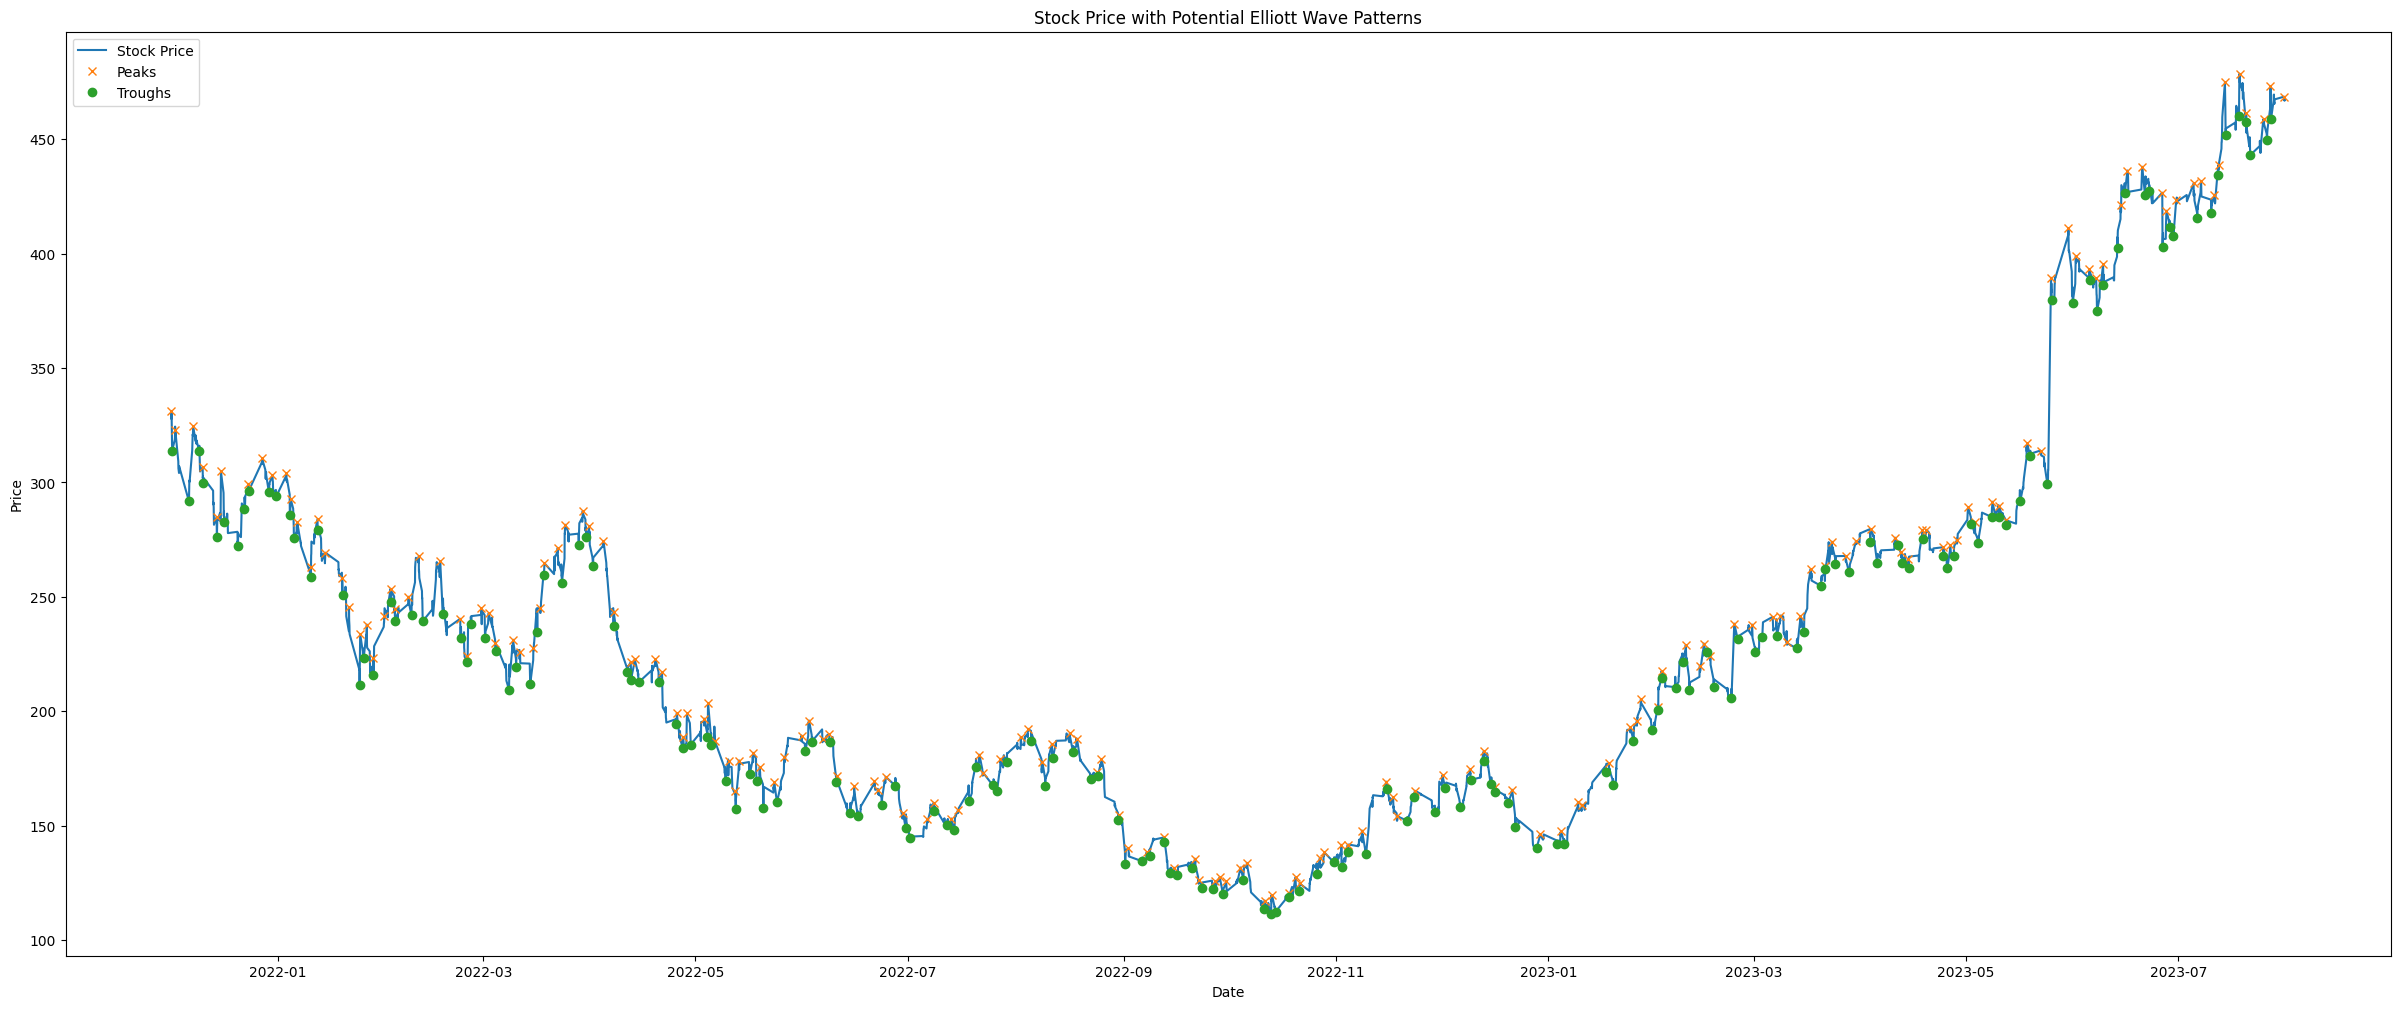

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.signal import find_peaks

def identify_elliott_waves(prices, distance=10, prominence=1):
    # Find peaks
    peaks, _ = find_peaks(prices, distance=distance, prominence=prominence)
    # Find troughs
    inverted_prices = prices * -1
    troughs, _ = find_peaks(inverted_prices, distance=distance, prominence=prominence)
    return {'peaks': peaks, 'troughs': troughs}

def calculate_wave_features(wave_indices, prices):
    wave_lengths = []
    wave_amplitudes = []
    for i in range(1, len(wave_indices)):
        start_idx = wave_indices[i - 1]
        end_idx = wave_indices[i]
        wave_lengths.append(abs(end_idx - start_idx))
        wave_amplitudes.append(abs(prices[end_idx] - prices[start_idx]))
    return wave_lengths, wave_amplitudes

# Retrieve stock data
stock = yf.download('NVDA', start='2021-12-01', end='2023-08-01', interval='1h')
prices = stock['Close']

# Apply Elliott Wave Theory
wave_patterns = identify_elliott_waves(prices)

# Combine peaks and troughs and sort them
combined_indices = np.sort(np.concatenate((wave_patterns['peaks'], wave_patterns['troughs'])))

# Calculate wave lengths and amplitudes
wave_lengths, wave_amplitudes = calculate_wave_features(combined_indices, prices.values)

# Add calculated features to the DataFrame
stock['Wave_Length'] = np.nan
stock['Wave_Amplitude'] = np.nan
for i, idx in enumerate(combined_indices[1:]):
    stock.loc[stock.index[idx], 'Wave_Length'] = wave_lengths[i]
    stock.loc[stock.index[idx], 'Wave_Amplitude'] = wave_amplitudes[i]

# Initialize a new column in 'stock' DataFrame for wave status
stock['Wave_Status'] = 'none'
stock.loc[stock.index[wave_patterns['peaks']], 'Wave_Status'] = 'peak'
stock.loc[stock.index[wave_patterns['troughs']], 'Wave_Status'] = 'trough'

# Numerically categorize the 'Wave_Status' column
status_mapping = {'peak': 2, 'trough': 1, 'none': 0}
stock['Wave_Status'] = stock['Wave_Status'].map(status_mapping)

# Visualization
plt.figure(figsize=(30, 12))
plt.plot(prices, label='Stock Price')
plt.plot(prices.index[wave_patterns['peaks']], prices.iloc[wave_patterns['peaks']], 'x', label='Peaks')
plt.plot(prices.index[wave_patterns['troughs']], prices.iloc[wave_patterns['troughs']], 'o', label='Troughs')
plt.title('Stock Price with Potential Elliott Wave Patterns')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
stock = stock.reset_index()

In [54]:
stock.fillna(0, inplace=True)

In [55]:
stock.head(40)

,Datetime,Open,High,Low,Close,Adj Close,Volume,Wave_Length,Wave_Amplitude,Wave_Status
0,2021-12-01 09:30:00-05:00,332.194702,332.893402,326.339996,327.989990,327.989990,10873612,0.0,0.000000,0
1,2021-12-01 10:30:00-05:00,327.989990,332.880005,326.459991,331.274994,331.274994,6058152,0.0,0.000000,2
2,2021-12-01 11:30:00-05:00,331.260010,332.010010,327.300110,328.720001,328.720001,4789543,0.0,0.000000,0
3,2021-12-01 12:30:00-05:00,328.804993,329.095001,321.120087,324.019989,324.019989,5715884,0.0,0.000000,0
4,2021-12-01 13:30:00-05:00,324.148590,324.359985,320.000000,322.489685,322.489685,5792680,0.0,0.000000,0
5,2021-12-01 14:30:00-05:00,322.529999,324.499908,314.399994,316.140015,316.140015,6997852,0.0,0.000000,0
6,2021-12-01 15:30:00-05:00,316.010010,319.799988,313.799988,313.970001,313.970001,5815615,5.0,17.304993,1
7,2021-12-02 09:30:00-05:00,312.140015,322.829987,310.250000,318.730011,318.730011,14897658,0.0,0.000000,0
8,2021-12-02 10:30:00-05:00,318.819000,321.279999,314.029999,319.595001,319.595001,6793721,0.0,0.000000,0
9,2021-12-02 11:30:00-05:00,319.799988,324.600006,316.950012,324.420013,324.420013,5082853,0.0,0.000000,0


In [56]:
stock['hour'] = stock['Datetime'].dt.hour
stock['month'] = stock['Datetime'].dt.month
stock['day'] = stock['Datetime'].dt.day

In [57]:
stock = stock.set_index('Datetime')
stock

,Open,High,Low,Close,Adj Close,Volume,Wave_Length,Wave_Amplitude,Wave_Status,hour,month,day
Datetime,,,,,,,,,,,,
2021-12-01 09:30:00-05:00,332.194702,332.893402,326.339996,327.989990,327.989990,10873612,0.0,0.0,0,9,12,1
2021-12-01 10:30:00-05:00,327.989990,332.880005,326.459991,331.274994,331.274994,6058152,0.0,0.0,2,10,12,1
2021-12-01 11:30:00-05:00,331.260010,332.010010,327.300110,328.720001,328.720001,4789543,0.0,0.0,0,11,12,1
2021-12-01 12:30:00-05:00,328.804993,329.095001,321.120087,324.019989,324.019989,5715884,0.0,0.0,0,12,12,1
2021-12-01 13:30:00-05:00,324.148590,324.359985,320.000000,322.489685,322.489685,5792680,0.0,0.0,0,13,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31 11:30:00-04:00,466.929993,468.040009,465.329987,467.369995,467.369995,2607331,0.0,0.0,0,11,7,31
2023-07-31 12:30:00-04:00,467.290009,467.799988,465.060089,467.019989,467.019989,2482994,0.0,0.0,0,12,7,31
2023-07-31 13:30:00-04:00,466.970001,468.609985,466.600006,467.019989,467.019989,2051743,0.0,0.0,0,13,7,31


In [58]:
stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Wave_Length',
       'Wave_Amplitude', 'Wave_Status', 'hour', 'month', 'day'],
      dtype='object')

In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten


stock = stock[['Close', 'Wave_Length', 'Wave_Amplitude', 'Wave_Status', 'hour', 'month']]

# Assuming df is your DataFrame
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock)

# Create sequences
def create_sequences(data, input_steps, output_steps):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps + 1):
        X.append(data[i:(i + input_steps)])
        y.append(data[(i + input_steps):(i + input_steps + output_steps), 0])  # Assuming 'Close' is at index 0
    return np.array(X), np.array(y)

input_steps = 48  # last 168 timesteps
output_steps = 12  # predicting next 24 timesteps
X, y = create_sequences(scaled_data, input_steps, output_steps)

# Split the data into training and testing sets
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

# Build the model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_steps, X.shape[2])),
    #MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(output_steps)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)



Epoch 1/50
89/89 [==============================] - 6s 25ms/step - loss: 0.0179
Epoch 2/50
89/89 [==============================] - 2s 23ms/step - loss: 0.0012
Epoch 3/50
89/89 [==============================] - 2s 23ms/step - loss: 0.0011
Epoch 4/50
89/89 [==============================] - 2s 23ms/step - loss: 9.6597e-04
Epoch 5/50
89/89 [==============================] - 2s 23ms/step - loss: 9.5999e-04
Epoch 6/50
89/89 [==============================] - 2s 23ms/step - loss: 8.4339e-04
Epoch 7/50
89/89 [==============================] - 2s 23ms/step - loss: 8.7581e-04
Epoch 8/50
89/89 [==============================] - 2s 24ms/step - loss: 7.5235e-04
Epoch 9/50
89/89 [==============================] - 2s 25ms/step - loss: 7.1295e-04
Epoch 10/50
89/89 [==============================] - 2s 23ms/step - loss: 7.5871e-04
Epoch 11/50
89/89 [==============================] - 2s 23ms/step - loss: 7.0386e-04
Epoch 12/50
89/89 [==============================] - 2s 22ms/step - loss: 6.5268e-04
E

In [60]:
# Make predictions
predictions = model.predict(X_test)

1/1 [==============================] - 1s 678ms/step


In [61]:
predictions.shape

(12, 12)

In [62]:
# Number of features in the original dataset
num_features = scaled_data.shape[1]

# Reshape predictions to match the number of features
# Assuming predictions are for 'Close' price only, the rest of the features remain 0
predictions_reshaped = predictions.reshape(-1, output_steps)

# Create dummy data for inverse transformation
dummy_data = np.zeros((predictions_reshaped.shape[0], num_features))

# Place predictions in the 'Close' price column (assuming it's at index 3)
dummy_data[:, 0] = predictions_reshaped[:, -1]  # Use the last prediction of each sequence

# Apply inverse transformation
rescaled_predictions = scaler.inverse_transform(dummy_data)[:, 0]

In [63]:
rescaled_predictions, rescaled_predictions.shape

(array([461.50165535, 459.32892897, 460.42983478, 461.92309586,
        461.53034666, 465.08485165, 466.02426763, 464.81363016,
        465.26496565, 463.48083031, 465.63924386, 465.01212761]),
 (12,))

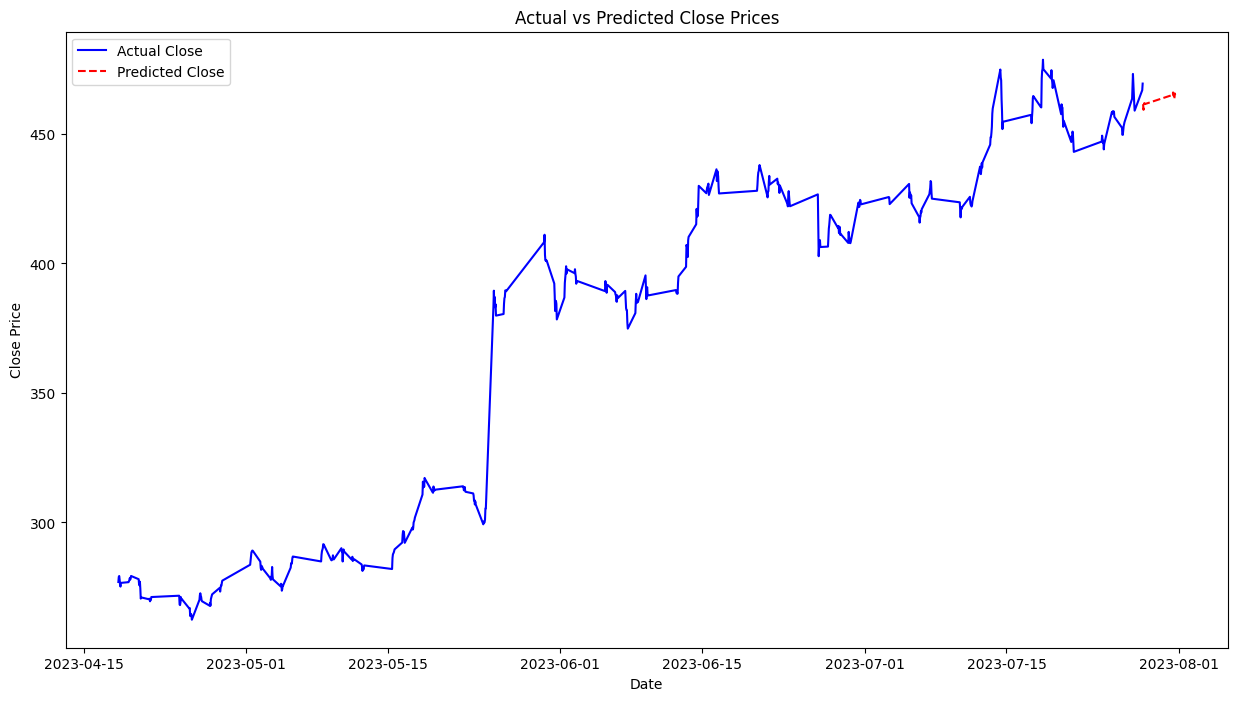

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(stock.index[-500:-12], stock['Close'][-500:-12], label=f'Actual Close', color='blue')
plt.plot(stock.index[-12:], rescaled_predictions, label=f'Predicted Close', color='red', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

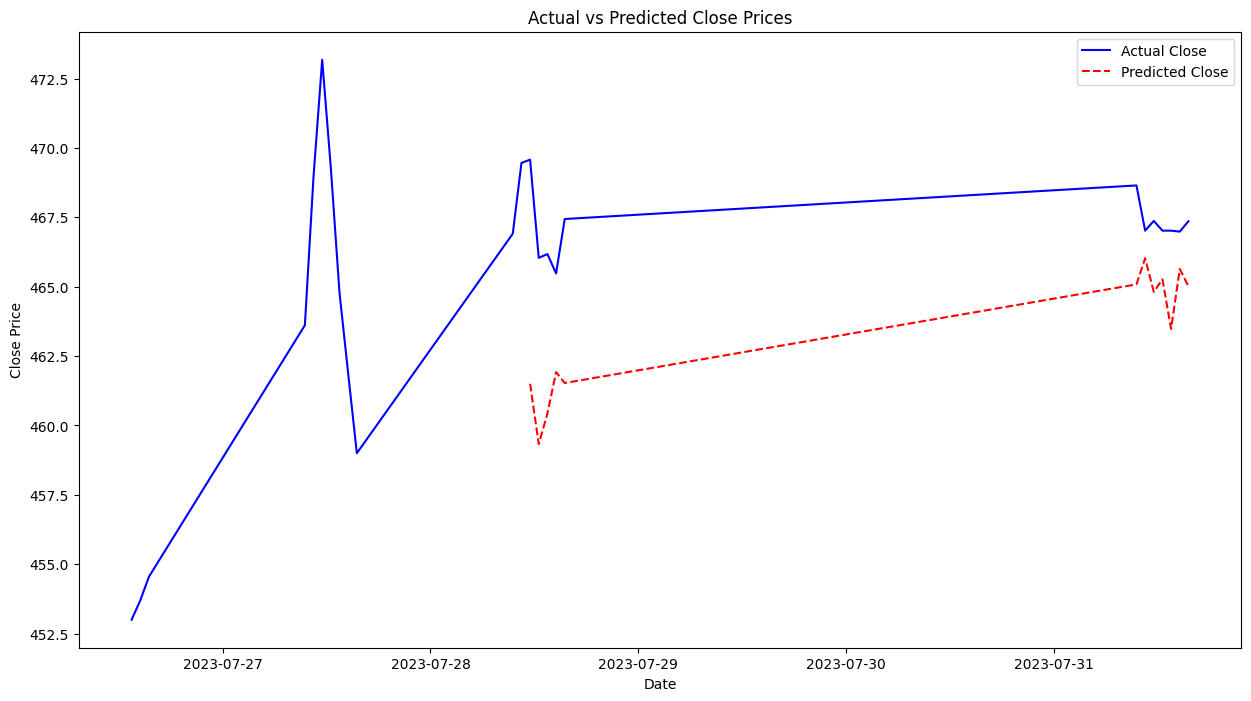

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(stock.index[-24:], stock['Close'][-24:], label=f'Actual Close', color='blue')
plt.plot(stock.index[-12:], rescaled_predictions, label=f'Predicted Close', color='red', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()